# Proyecto 02 - Reconocimiento de patrones

## Giovanni Gamaliel López Padilla

### Versión imagenes normales

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install git+https://github.com/tensorflow/examples.git -q
!wget https://raw.githubusercontent.com/giovannilopez9808/Reconocimiento_de_patrones_proyecto_02/main/Scripts/Modules/generators.py -q
!wget https://raw.githubusercontent.com/giovannilopez9808/Reconocimiento_de_patrones_proyecto_02/main/Scripts/Modules/params.py -q
!wget https://raw.githubusercontent.com/giovannilopez9808/Reconocimiento_de_patrones_proyecto_02/main/Scripts/Modules/unet_model.py -q

    Running setup.py install for tensorflow-examples ... done
  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [3]:
from params import get_params,get_args,organization_files,mkdir
from unet_model import unet_model,transform_image
from generators import generator_model

In [4]:
from os import listdir, makedirs
from argparse import Namespace
from os.path import join


def get_params(select_data: str) -> dict:
    """
    parametros de los datos a tratar
    """
    params = {
        "root": "/content/drive/MyDrive/Patrones",
        # Direccion de los datos
        "path data": "Data",
        # Direccion de las graphicas
        "path graphics": "Graphics",
        # Direccion original de los datos
        "folder image": "",
        # Direccion original de las mascaras
        "folder mask": "label",
        # Direccion de los resultados
        "path results": "Results",
        # Tipos de datos en el modelo
        "data types": ["train",
                       "test",
                        "validate"]}
    if select_data == "high contrast":
        params["folder image"] = "high_contrast"
    if select_data == "normal":
        params["folder image"] = "normal"
    if select_data == "grayscale":
        params["folder image"] = "grayscale"
    params["path graphics"] = join(params["root"],
                                   params["path graphics"],
                                   params["folder image"])
    params["path results"] = join(params["path results"],
                                  params["folder image"])
    params["path data"] = join(params["root"],
                               params["path data"])
    params["path results"] = join(params["root"],
                                  params["path results"])
    return params


def get_args(params: dict) -> Namespace:
    """
    Definicion de los argumentos a utilizar en los entrenamientos
    """
    args = Namespace()
    args.train_len = len(params[f"train {params['folder image']}"])
    args.val_len = len(params[f"validate {params['folder image']}"])
    args.batch_size_train = 32
    args.batch_size_val = 40
    args.batch_size_test = 20
    args.steps_per_epoch_train = args.train_len // args.batch_size_train
    args.steps_per_epoch_val = args.val_len // args.batch_size_val
    args.epochs = 15
    return args


def ls(path: str) -> list:
    """
    Estandarización del listdir
    """
    files = sorted(listdir(path))
    return files


def mkdir(path: str) -> None:
    """
    Estandarizacion del makedirs
    """
    makedirs(path, exist_ok=True)


def organization_files(params: dict) -> dict:
    """
    Organización de los datos obtenidos en la pagina
    https://www.kaggle.com/datasets/srinjoybhuiya/vesselnet-code

    params: diccionario con las direcciones de los datos
    """
    folders = [params["folder image"],
               params["folder mask"]]
    for folder in folders:
        for data_type in params["data types"]:
            # Definicion de las direcciones de los datos organizados
            path = join(params["path data"],
                        data_type, folder)
            params[f"path {data_type} {folder} all"] = path
            path = join(path,
                        "data")
            params[f"path {data_type} {folder}"] = path
            params[f"{data_type} {folder}"] = ls(
                params[f"path {data_type} {folder}"])
    return params


### Parametros de direcciones y argumentos del modelo

In [5]:
params=get_params("grayscale")
params=organization_files(params)
args=get_args(params)
data_generator=generator_model(params,args)

Found 1008 images belonging to 1 classes.
Found 1008 images belonging to 1 classes.
Found 252 images belonging to 1 classes.
Found 252 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Found 20 images belonging to 1 classes.


### Capas no entrenables

In [6]:
model=unet_model("none")
model.compile()
params["model name"]="model_01.h5"
params["history name"]="history_01.csv"
model.run(params,args,data_generator)

9420800/9406464 [==============================] - 0s 0us/step
Epoch 1/15
31/31 [==============================] - 334s 11s/step - loss: 0.5678 - accuracy: 0.7351 - val_loss: 0.4758 - val_accuracy: 0.8615
Epoch 2/15
31/31 [==============================] - 42s 1s/step - loss: 0.4224 - accuracy: 0.8565 - val_loss: 0.3675 - val_accuracy: 0.9097
Epoch 3/15
31/31 [==============================] - 42s 1s/step - loss: 0.3644 - accuracy: 0.8705 - val_loss: 0.3112 - val_accuracy: 0.9164
Epoch 4/15
31/31 [==============================] - 44s 1s/step - loss: 0.3370 - accuracy: 0.8749 - val_loss: 0.2778 - val_accuracy: 0.9213
Epoch 5/15
31/31 [==============================] - 43s 1s/step - loss: 0.3180 - accuracy: 0.8803 - val_loss: 0.2532 - val_accuracy: 0.9248
Epoch 6/15
31/31 [==============================] - 43s 1s/step - loss: 0.3064 - accuracy: 0.8835 - val_loss: 0.2380 - val_accuracy: 0.9282
Epoch 7/15
31/31 [==============================] - 44s 1s/step - loss: 0.2942 - accuracy: 0.88

### Fine tunning

In [7]:
model = unet_model("last conv")
model.compile()
params["model name"]="model_02.h5"
params["history name"]="history_02.csv"
model.run(params,args,data_generator)

Epoch 1/15
31/31 [==============================] - 46s 1s/step - loss: 0.6728 - accuracy: 0.6611 - val_loss: 0.5372 - val_accuracy: 0.7628
Epoch 2/15
31/31 [==============================] - 41s 1s/step - loss: 0.4595 - accuracy: 0.8390 - val_loss: 0.3926 - val_accuracy: 0.9006
Epoch 3/15
31/31 [==============================] - 42s 1s/step - loss: 0.3843 - accuracy: 0.8647 - val_loss: 0.3271 - val_accuracy: 0.9131
Epoch 4/15
31/31 [==============================] - 41s 1s/step - loss: 0.3493 - accuracy: 0.8719 - val_loss: 0.2889 - val_accuracy: 0.9182
Epoch 5/15
31/31 [==============================] - 41s 1s/step - loss: 0.3254 - accuracy: 0.8791 - val_loss: 0.2627 - val_accuracy: 0.9219
Epoch 6/15
31/31 [==============================] - 44s 1s/step - loss: 0.3149 - accuracy: 0.8803 - val_loss: 0.2456 - val_accuracy: 0.9259
Epoch 7/15
31/31 [==============================] - 42s 1s/step - loss: 0.2989 - accuracy: 0.8877 - val_loss: 0.2309 - val_accuracy: 0.9295
Epoch 8/15
31/31 [==

### Full tunning

In [8]:
model = unet_model("all")
model.compile()
params["model name"]="model_03.h5"
params["history name"]="history_03.csv"
model.run(params,args,data_generator)

Epoch 1/15
31/31 [==============================] - 59s 1s/step - loss: 0.6899 - accuracy: 0.5775 - val_loss: 0.5706 - val_accuracy: 0.6484
Epoch 2/15
31/31 [==============================] - 44s 1s/step - loss: 0.4669 - accuracy: 0.8179 - val_loss: 0.4139 - val_accuracy: 0.8864
Epoch 3/15
31/31 [==============================] - 46s 2s/step - loss: 0.3806 - accuracy: 0.8737 - val_loss: 0.3297 - val_accuracy: 0.9180
Epoch 4/15
31/31 [==============================] - 44s 1s/step - loss: 0.3388 - accuracy: 0.8837 - val_loss: 0.2815 - val_accuracy: 0.9234
Epoch 5/15
31/31 [==============================] - 45s 1s/step - loss: 0.3140 - accuracy: 0.8889 - val_loss: 0.2512 - val_accuracy: 0.9259
Epoch 6/15
31/31 [==============================] - 48s 2s/step - loss: 0.2913 - accuracy: 0.8961 - val_loss: 0.2332 - val_accuracy: 0.9278
Epoch 7/15
31/31 [==============================] - 44s 1s/step - loss: 0.2840 - accuracy: 0.8969 - val_loss: 0.2216 - val_accuracy: 0.9277
Epoch 8/15
31/31 [==

### Resultados

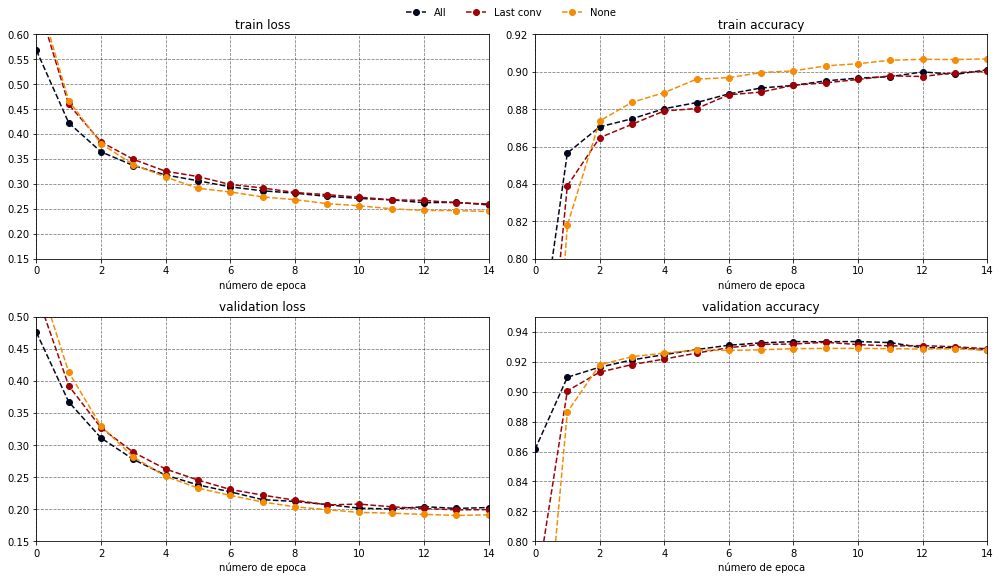

In [9]:
from numpy import linspace, array
import matplotlib.pyplot as plt
from pandas import read_csv
from os.path import join

datasets_parameters = {
    "files":["history_01.csv",
             "history_02.csv",
             "history_03.csv"],
    "loss": {
        "y lim": [0.15, 0.6],
        "title": "train loss"
    },
    "accuracy": {
        "y lim": [0.8, 0.92],
        "title": "train accuracy"},
    "val_loss": {
        "y lim": [0.15, 0.5],
        "title": "validation loss"
    },
    "val_accuracy": {
        "y lim": [0.8, 0.95],
        "title": "validation accuracy"
    },
}
colors = {"history_01.csv": {"color":"#03071e",
                             "title": "All"},
          "history_02.csv": {"color":"#9d0208",
                             "title": "Last conv"},
          "history_03.csv": {"color":"#f48c06",
                             "title": "None"},
          }
history={}
for filename in datasets_parameters["files"]:
    file = join(params["path results"],
                    filename)
    data = read_csv(file,
                    index_col=0)
    history[filename] = data.copy()

fig, axs = plt.subplots(2, 2,
                        figsize=(14, 8))
axs=axs.flatten()
for train_type in history:
    data = history[train_type]
    color = colors[train_type]["color"]
    title = colors[train_type]["title"]
    for ax, parameter in zip(axs, data.columns):
        dataset = datasets_parameters[parameter]
        parameter_data = data[parameter]
        epochs = list(data.index)
        ax.plot(epochs,
                parameter_data,
                label=title,
                color=color,
                ls="--",
                marker="o")
        ax.set_title(datasets_parameters[parameter]["title"])
        ax.set_xlabel("número de epoca")
        ax.set_xlim(0,14)
        ax.set_ylim(dataset["y lim"][0],
                    dataset["y lim"][1])
        ax.grid(ls="--",
                color="#000000",
                alpha=0.5)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles,
           labels,
           bbox_to_anchor=(0.62,
                           1.01),
           ncol=3,
           frameon=False
           )
plt.tight_layout()
plt.show()

### Predicciones

In [10]:
import matplotlib.pyplot as plt
from os.path import join
import tensorflow as tf
from numpy import array

images,masks=next(data_generator.test)

#### Lectura de los modelos

In [11]:
model_none=unet_model("none")
model_none.compile()
filename=join(params["path results"],
              "model_01.h5")
model_none.load(filename)

filename=join(params["path results"],
              "model_02.h5")
model_last=tf.keras.models.load_model(filename)

model_all=unet_model("all")
model_all.compile()
filename=join(params["path results"],
              "model_03.h5")
model_all.load(filename)

In [17]:
from tqdm import tqdm
def plot(ax:plt.axes,image:array,title:str):
    ax.set_title(title)
    ax.imshow(image,
              cmap="gray")
    ax.axis("off")

size = args.batch_size_test // 10
for i,(image,mask) in tqdm(enumerate(zip(images,masks))):
    # Prediccion none
    predict_none = model_none.predict(image)
    # Prediction last conv
    test_image=transform_image(image)
    predict_last = model_last.predict(test_image)
    predict_last=(predict_last[0,:,:,:]>0.5)
    # Prediccion all
    predict_all = model_all.predict(image)
    fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,
                                        figsize=(20,6))
    plot(ax1,image,"Original")
    plot(ax2,predict_none[:,:,0],"None")
    plot(ax3,predict_last[:,:,0],"Fine tuning")
    plot(ax4,predict_all[:,:,0],"Full tuning")
    plt.tight_layout()
    filename = str(i).zfill(size)
    filename = join(params["path graphics"],
                    filename)
    plt.savefig(filename,
                dpi=400)

Output hidden; open in https://colab.research.google.com to view.